## Elastic Net Question 1

#### __1.1: Load the diabetes dataset. Make sure to load the features (X) and target (y) separately.__

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes_data = load_diabetes()

X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = pd.Series(diabetes_data.target, name='target')

print(X.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


#### __1.2 Compute a summary statistics (count, mean, standard deviation, min, 25%, 50%, 75% percentiles, max) for each variable including the target__

In [2]:
df = X.copy()
df['target'] = y

sum_stats = df.describe()
print(sum_stats)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

#### __1.3 Plot a bar chart showing the correlation between the target and each feature.__

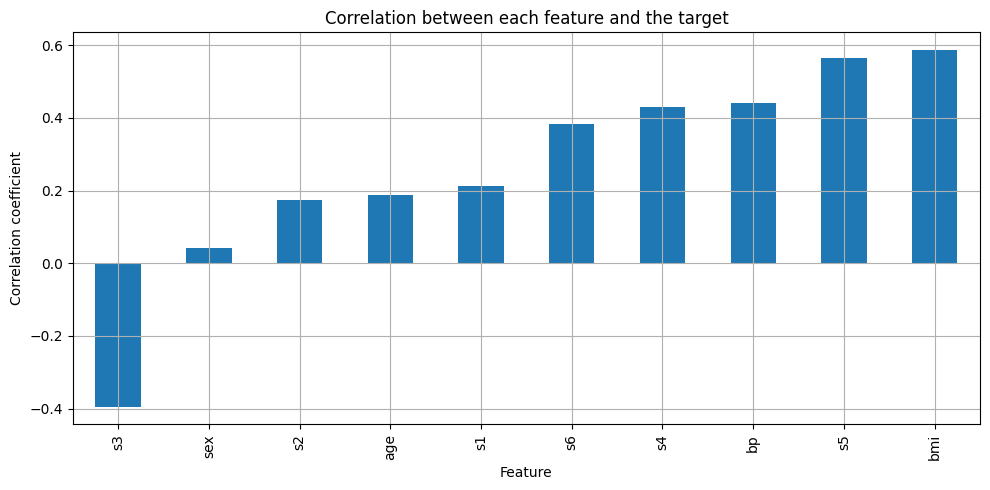

In [3]:
import matplotlib.pyplot as plt

correlations = df.corr()['target'].drop('target') 

plt.figure(figsize=(10, 5))
correlations.sort_values().plot(kind='bar')
plt.title('Correlation between each feature and the target')
plt.ylabel('Correlation coefficient')
plt.xlabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


#### __1.4 Normalize and split the data into training, validation, and testing datasets.__

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### __1.4 Initiate a elasticnet in sklearn. Select a range of values of alpha and l1_ratio (hyperparameter space), set up the GridSearchCV with cv=3 and scoring='negative_mean_squared_error' and execute the model fit.__

In [5]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic_net = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             return_train_score=True, scoring='neg_mean_squared_error')

#### __1.6 Report the cross-validation results__

In [ ]:
import pandas as pd
cross_val_results = pd.DataFrame(grid_search.cv_results_)

cv_sum = cross_val_results[['param_alpha', 'param_l1_ratio', 'mean_test_score', 'rank_test_score']]
cv_sum = cv_sum.sort_values(by='rank_test_score')

print(cv_sum)


    param_alpha  param_l1_ratio  mean_test_score  rank_test_score
2          0.01             0.9     -3081.447016                1
3          0.10             0.1     -3082.145813                2
1          0.01             0.5     -3082.971135                3
0          0.01             0.1     -3084.839109                4
4          0.10             0.5     -3085.750872                5
5          0.10             0.9     -3089.819634                6
8          1.00             0.9     -3091.691353                7
7          1.00             0.5     -3195.001399                8
6          1.00             0.1     -3340.367009                9
11        10.00             0.9     -3805.587225               10
10        10.00             0.5     -4633.798608               11
9         10.00             0.1     -4947.691153               12


#### __1.7 Which model was selected?__

#### the best combo is alpha = 0.01, L1 ratio of 0.9 which has the least negative MSE of -3081.447016 

#### __1.8 Evaluate the model on the test dataset. Report the squared root of the mean squared error.__

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = grid_search.best_estimator_.predict(X_test)
rmse_val = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_val:.2f}")

Test RMSE: 53.81


#### __1.9 Plot a bar chart with the final parameter estimates.__

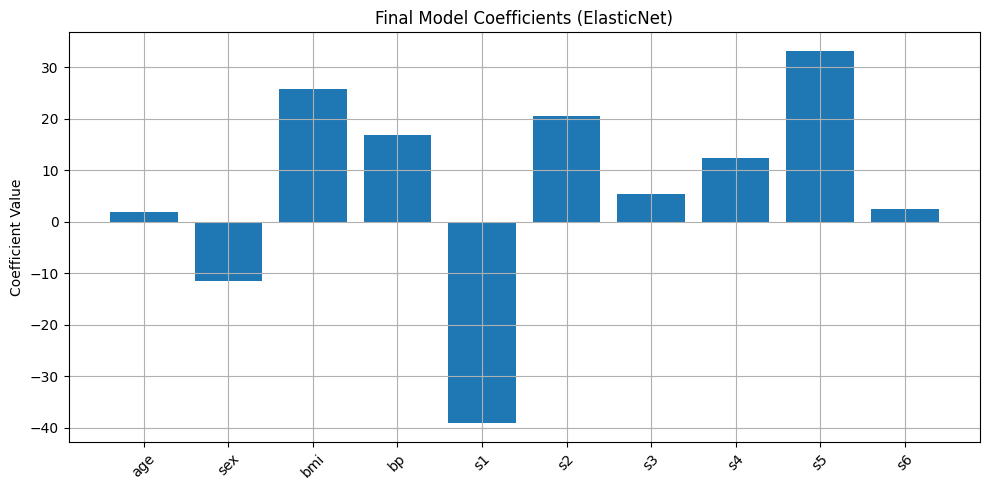

In [8]:
import matplotlib.pyplot as plt

coef = grid_search.best_estimator_.coef_
ft_names = diabetes_data.feature_names

plt.figure(figsize=(10, 5))
plt.bar(ft_names, coef)
plt.xticks(rotation=45)
plt.title("Final Model Coefficients (ElasticNet)")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## Elastic Net Question 2

#### __2.0 Load the data and review information about the data.__

In [9]:
import pandas as pd

url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(url, sep="\t", index_col=0)

print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nShape:", df.shape)

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa  \
1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783   
2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519   
3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519   
4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519   
5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564   

  train  
1     T  
2     T  
3     T  
4     T  
5     T  

Columns: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa', 'train']

Shape: (97, 10)


#### __2.1 Load the dataset. Make sure to load the features (X) and target (y) separately.__

In [10]:
df_train = df[df['train'] == 'T'].drop(columns='train')
df_test = df[df['train'] == 'F'].drop(columns='train')

X_train = df_train.drop(columns='lpsa')
y_train = df_train['lpsa']

X_test = df_test.drop(columns='lpsa')
y_test = df_test['lpsa']

print("Train X:", X_train.shape)
print("Train y:", y_train.shape)
print("Test X:", X_test.shape)
print("Test y:", y_test.shape)

Train X: (67, 8)
Train y: (67,)
Test X: (30, 8)
Test y: (30,)


#### __2.2 Compute a summary statistics (count, mean, standard deviation, min, 25%, 50%, 75% percentiles, max) for each variable including the target.__

In [11]:
train_df = X_train.copy()
train_df['lpsa'] = y_train

sum_stats_2 = train_df.describe()
print(sum_stats_2)

          lcavol    lweight        age       lbph        svi        lcp  \
count  67.000000  67.000000  67.000000  67.000000  67.000000  67.000000   
mean    1.313492   3.626108  64.746269   0.071440   0.223881  -0.214203   
std     1.242590   0.476601   7.502208   1.463655   0.419989   1.400735   
min    -1.347074   2.374906  41.000000  -1.386294   0.000000  -1.386294   
25%     0.488279   3.330360  61.000000  -1.386294   0.000000  -1.386294   
50%     1.467874   3.598681  65.000000  -0.051293   0.000000  -0.798508   
75%     2.349065   3.883610  69.000000   1.547506   0.000000   0.994793   
max     3.821004   4.780383  79.000000   2.326302   1.000000   2.656757   

         gleason       pgg45       lpsa  
count  67.000000   67.000000  67.000000  
mean    6.731343   26.268657   2.452345  
std     0.708864   29.301764   1.207812  
min     6.000000    0.000000  -0.430783  
25%     6.000000    0.000000   1.667306  
50%     7.000000   15.000000   2.568788  
75%     7.000000   50.000000  

#### __2.3 Plot a bar chart showing the correlation between the target and each feature.__

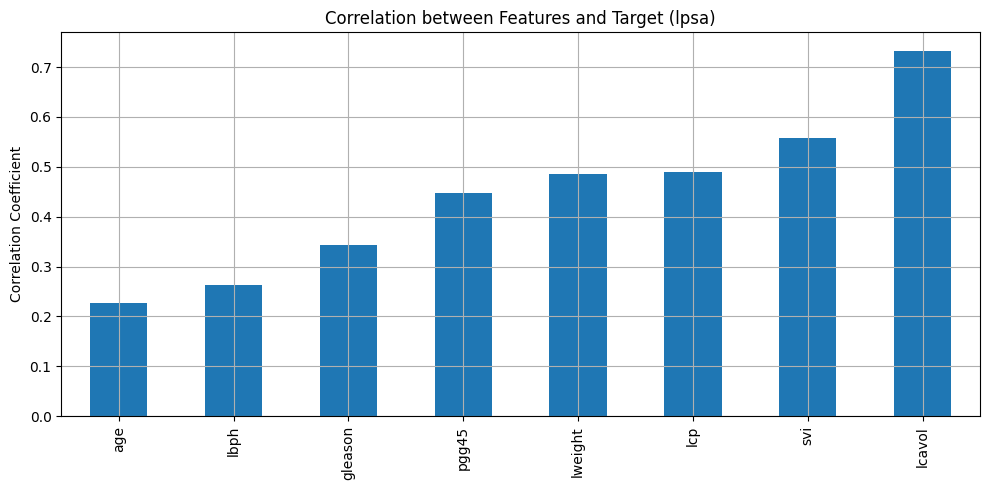

In [ ]:
import matplotlib.pyplot as plt

corr_2 = train_df.corr()['lpsa'].drop('lpsa')

plt.figure(figsize=(10, 5))
corr_2.sort_values().plot(kind='bar')
plt.title('Correlation between Features and Target (lpsa)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


#### __2.4 Normalize and split the data into training, validation, and testing datasets.__

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_subtrain_scaled = scaler.fit_transform(X_subtrain)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


#### __2.5 Initiate a elasticnet in sklearn. Select a range of values of alpha and l1_ratio (hyperparameter space), set up the GridSearchCV with cv=3 and scoring='negative_mean_squared_error' and execute the model fit.__

In [14]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic_net = ElasticNet(max_iter=10000)

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
grid_search.fit(X_subtrain_scaled, y_subtrain)

GridSearchCV(cv=3, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             return_train_score=True, scoring='neg_mean_squared_error')

#### __2.6 Report the cross-validation results__

In [ ]:
import pandas as pd

cv_res_2 = pd.DataFrame(grid_search.cv_results_)

cv_sum_2 = cv_res_2[['param_alpha', 'param_l1_ratio', 'mean_test_score', 'rank_test_score']]
cv_sum_2 = cv_sum_2.sort_values(by='rank_test_score')

print(cv_sum_2)

    param_alpha  param_l1_ratio  mean_test_score  rank_test_score
0          0.01             0.1        -0.567003                1
1          0.01             0.5        -0.569137                2
2          0.01             0.9        -0.571718                3
3          0.10             0.1        -0.592378                4
4          0.10             0.5        -0.628335                5
5          0.10             0.9        -0.634239                6
6          1.00             0.1        -0.749675                7
7          1.00             0.5        -1.007981                8
8          1.00             0.9        -1.306248                9
9         10.00             0.1        -1.318417               10
10        10.00             0.5        -1.318417               10
11        10.00             0.9        -1.318417               10


#### __2.7 Which model was selected?__

#### the best model has an alpha = 0.01 and L1 ration = 0.1 with a MSE of -0.567003 

#### __2.8 Evaluate the model on the test dataset. Report the squared root of the mean squared error.___

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = grid_search.best_estimator_.predict(X_test_scaled)

rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_2:.3f}")


Test RMSE: 0.745


#### __2.9 Plot a bar chart with the final parameter estimates.__ 

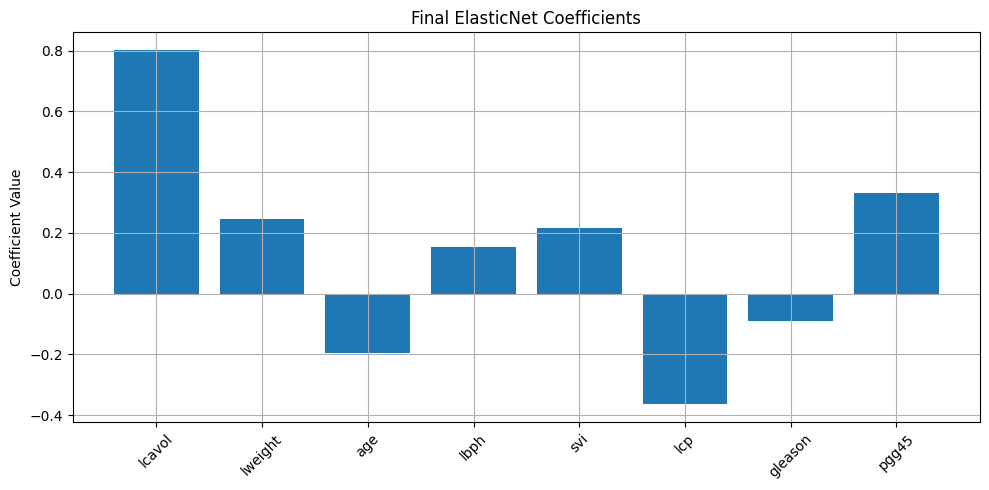

In [17]:
import matplotlib.pyplot as plt

coef_2 = grid_search.best_estimator_.coef_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
plt.bar(feature_names, coef_2)
plt.xticks(rotation=45)
plt.title("Final ElasticNet Coefficients")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()